In [1]:
import os
import seaborn as sns
import scanpy as sc
import matplotlib.pyplot as plt
import json
import numpy as np

In [2]:
sc.settings.set_figure_params(dpi=100, frameon=False)

In [3]:
ratio = 5
dir_path = os.path.expanduser(f'~/Documents/benchmarking_results/figure_9/pancreas/tranvae/population_{ratio}/')
save_path = os.path.expanduser(f'~/Documents/master_thesis_figures/tranvae_rare/pancreas/')
if not os.path.exists(save_path):
    os.makedirs(save_path)

In [4]:
adata = sc.read(f'{dir_path}full_data.h5ad')
adata

AnnData object with n_obs × n_vars = 14801 × 10
    obs: 'celltype', 'batch', 'predictions', 'leiden'
    uns: 'leiden', 'neighbors', 'umap'
    obsm: 'X_umap'
    obsp: 'connectivities', 'distances'

In [5]:
n_cells = len(adata)
n_delta = len(adata[adata.obs.celltype.isin(['Pancreas Delta'])])
ref_adata = adata[~adata.obs.batch.isin(['Pancreas Fluidigm C1'])].copy()
query_adata = adata[adata.obs.batch.isin(['Pancreas Fluidigm C1'])].copy()

n_delta_r = len(ref_adata[ref_adata.obs.celltype.isin(['Pancreas Delta'])])
n_delta_q = len(query_adata[query_adata.obs.celltype.isin(['Pancreas Delta'])])

print(f"DELTA IN ALL: {n_delta}")
print(f"DELTA IN REF: {n_delta_r}")
print(f"DELTA IN QUERY: {n_delta_q}")
print(f"DELTA PERCENTAGE: {(n_delta/n_cells)*100}%")

DELTA IN ALL: 161
DELTA IN REF: 140
DELTA IN QUERY: 21
DELTA PERCENTAGE: 1.0877643402472805%


In [6]:
adata.obs.batch = adata.obs.batch.replace('Pancreas CelSeq', 'Pancreas CelSeq (query)')
adata.obs.celltype = adata.obs.celltype.replace('Pancreas Delta', 'Pancreas Delta (rare)')

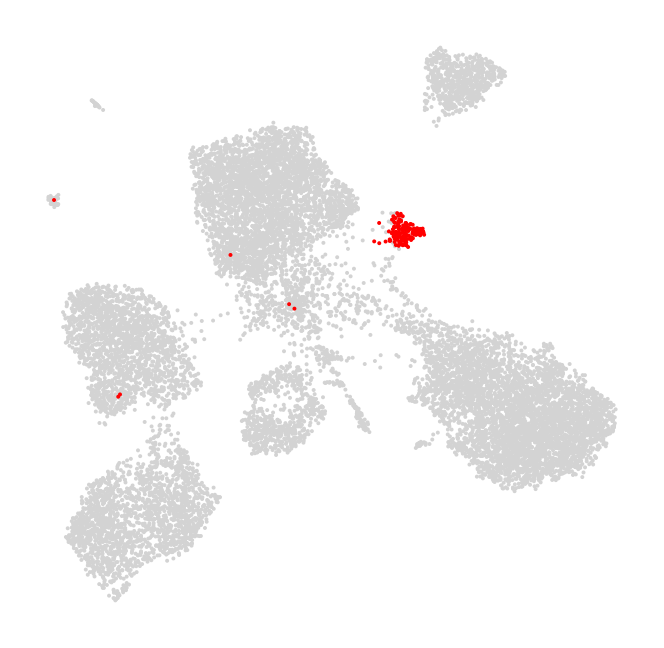

In [7]:
sc.pl.umap(
    adata,
    color="celltype",
    groups='Pancreas Delta (rare)',
    frameon=False,
    title='',
    #title='Rare cells',
    legend_loc="no_legend",
    ncols=1,
    show=False,
    palette=['red']
)
plt.savefig(f"{save_path}{ratio}_rare_ct.pdf", bbox_inches='tight')

In [8]:
b_c = sc.pl.palettes.godsnot_102[10:15]
batch_color = [b_c[2], b_c[3], b_c[0],b_c[4], b_c[1]]
f2_b = [batch_color[0],batch_color[4],batch_color[1],batch_color[3],batch_color[2]]

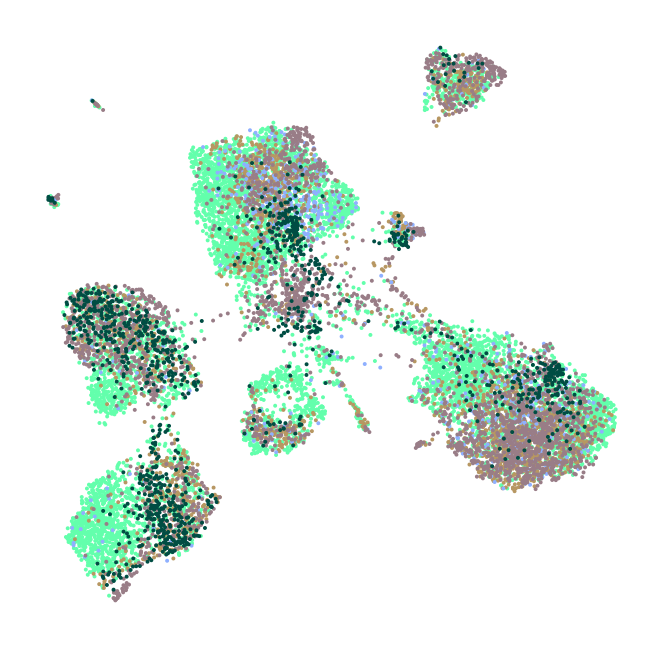

In [9]:
sc.pl.umap(
    adata,
    color="batch",
    frameon=False,
    title='',
    #title='Batch labels',
    legend_loc="no_legend",
    ncols=1,
    show=False,
    palette=f2_b
)
plt.savefig(f"{save_path}{ratio}_batch.pdf", bbox_inches='tight')

In [10]:
ct_c = sc.pl.palettes.godsnot_102
ct_color = [ct_c[0], ct_c[2],ct_c[3],ct_c[4],ct_c[5],ct_c[6],ct_c[7],ct_c[1]]
f2_c = [ct_color[0],ct_color[7],ct_color[1],ct_color[2],ct_color[3],ct_color[4],ct_color[5],ct_color[6]]

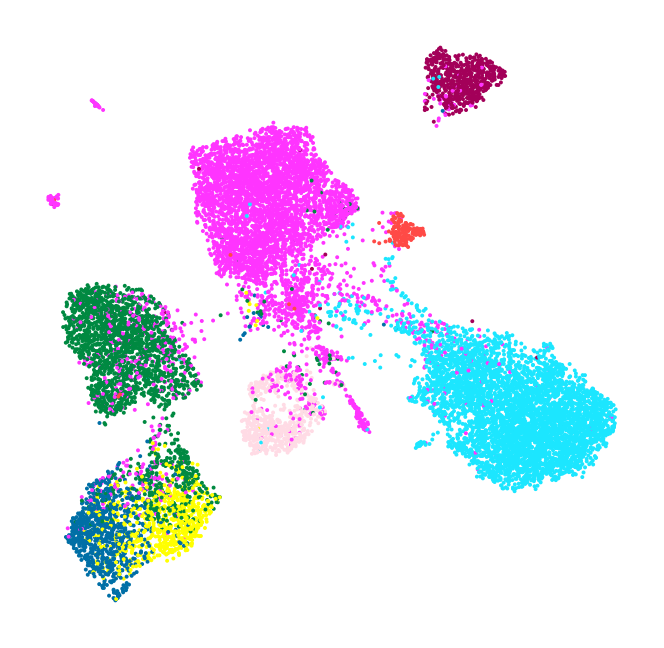

In [11]:
sc.pl.umap(
    adata,
    color="celltype",
    frameon=False,
    title='',
    #title='Cell type labels',
    legend_loc="no_legend",
    ncols=1,
    show=False,
    palette=f2_c
)
plt.savefig(f"{save_path}{ratio}_celltype.pdf", bbox_inches='tight')

<AxesSubplot:title={'center':'predictions'}, xlabel='UMAP1', ylabel='UMAP2'>

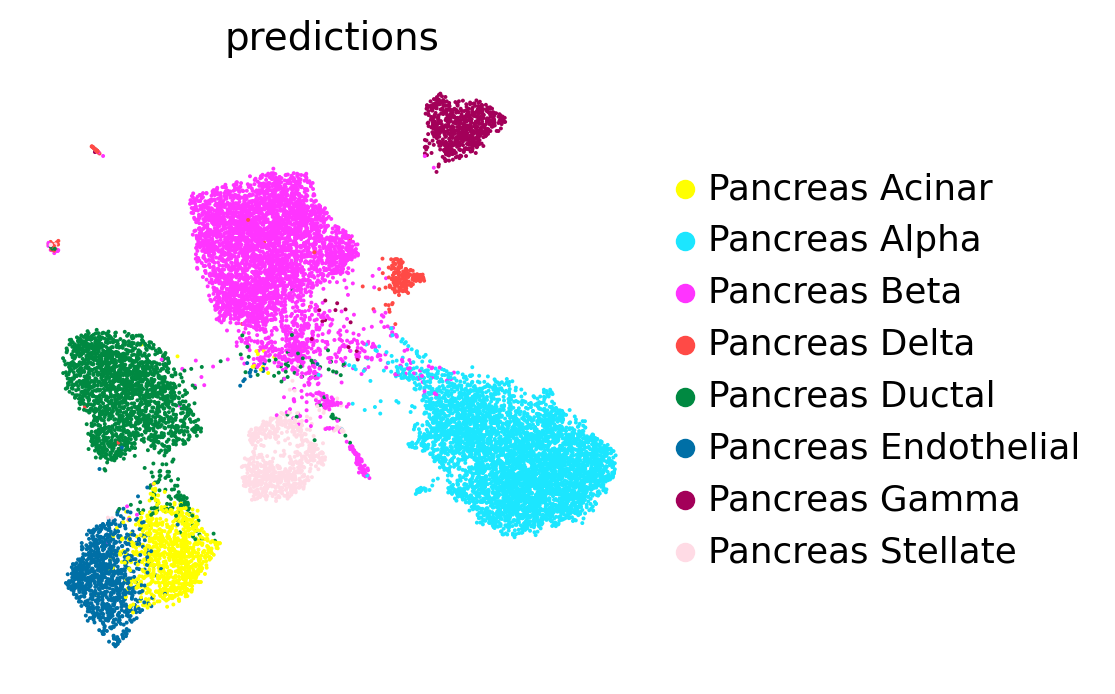

In [12]:
sc.pl.umap(
    adata,
    color="predictions",
    frameon=False,
    ncols=1,
    show=False,
    palette=f2_c
)